# Project: Investigate a Dataset (noshowappointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Data Analysis is a process of inspecting, investigating, cleaning data using statistical methods inorder to gain meaningful insight from data. In this project I would be analysing the noshowappiontment dataset. This dataset collects information of 100k medical appiontment in brazil and was originally sourced from kaggle.

>Question: What features are important for us to know in order to predict if a patient will show up for theirscheduled appointment?

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


> In this cell, I imported the required libriaries I would be using for my data analysis

<a id='wrangling'></a>
## Data Wrangling

> Data wrangling is an important process in our analysis, this involves getting data in the form that is useable.
this step includes:

> <li>Gathering Data </li>
>  This step involves collecting/selecting a dataset of choice and then I will load it into a dataframe using the pandas library.

> <li>Assessing Data</li>
> After loading the data in a pandas dataframe, we can now assess the data by checking its shape(i.e how many rows and columns), check for datatypes(i.e if the variable is a float, string, int or datatime), then we would also check for missing values as demonstrated in the cells below.

> <li>Cleaning Data</li>
>Real life data is dirty, inconsistent and incomplete, so we would need to clean the dataset if there are missing values by either deleting or replacing the values.


### Gathering data
In the cell below, we will load and read the csv file using the pandas 'read_csv()' function.
the data is loaded into the 'df' variable and we can check the first 5 rows using the '.head()' function.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#load dataset into dataframe

missing_values = ['na','--','n/a',' '] #creating a list of empty values
df = pd.read_csv('noshowappointments.csv', na_values = missing_values)
df.head() #check the first five rows


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> The cell below shows the last 5 rows of the dataset

In [3]:
df.tail() #check the last five rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Assessing data
> The cell below checks the shape/dimension of the dataset using the '.shape'. function
> The noshowappointment dataset contains a total of 110527 rows and 14 columns.

In [4]:
#check data dimension
print('The dimension of the dataset is:',df.shape)

The dimension of the dataset is: (110527, 14)


 >in the cell below, I checked the general information of the data using the '.info()' function. this shows the number of null values and datatype of each variable.

In [5]:
df.info() #give general information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>In the cell below, I am checking the summary of misssing values of each column in the dataset using the '.isnull().sum()' function.
>The results shows there are no missing values in the dataset.

In [6]:
#check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Data Cleaning 
>The dataset has no missing values so there is no deletion or replacement to carry out on the dataset. Encoding can also be caried out depending on what the independent variable of choice is for predictions.

>But it is observed that ScheduledDay is in a wrong format and the code below will change it to the correct datatype.

In [7]:
#convert to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay                 object
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis
>For the EDA Process, I would be analysing the dataset to summerise their main characteristic using Statistical and visualization methods

>In the following cells, I would be checking how 3 features 'Age', 'Neighbourhood and 'SMS_received' are important in predicting show or no-show to scheduled appointment by carrying out univariate analysis to describe them and multivariate analysis to check relatinship between the features.

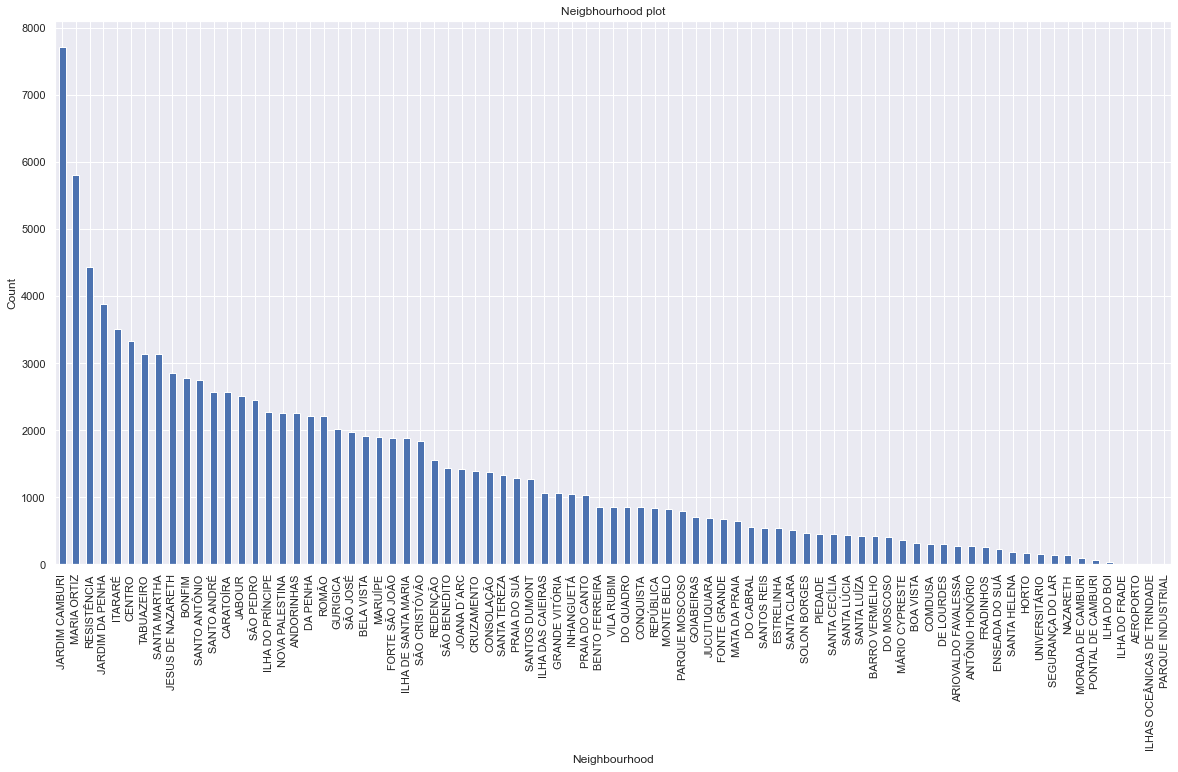

In [35]:
#visualise the neighbourhood variable
df['Neighbourhood'].value_counts().plot(kind='bar', figsize=(20,10));
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Neigbhourhood plot')
plt.show()

> The Bar chart above show the ranking of each neighbourhood in the data, with this we can deduce which has the highest frequency to show up or not to show-up for the appointment.

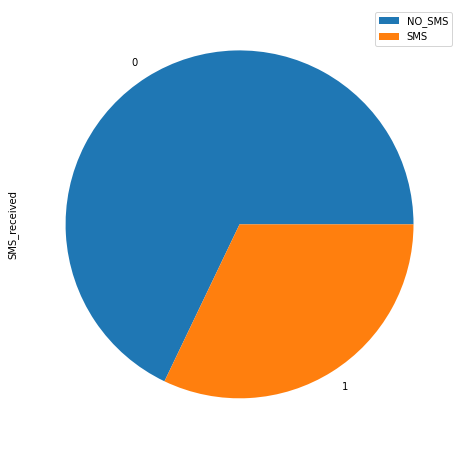

In [26]:
#histogram plot of the SMS_received variable

labels = ['NO_SMS','SMS']
df['SMS_received'].value_counts().plot(kind='pie', figsize=(8,8));
plt.legend(labels)
plt.show()

> The pie chart above is used to visualize and analyse the 'SMS_received' feature (i.e univariate analysis) and it shows the larger percentage of people do not receive SMS notifications(No_SMS)

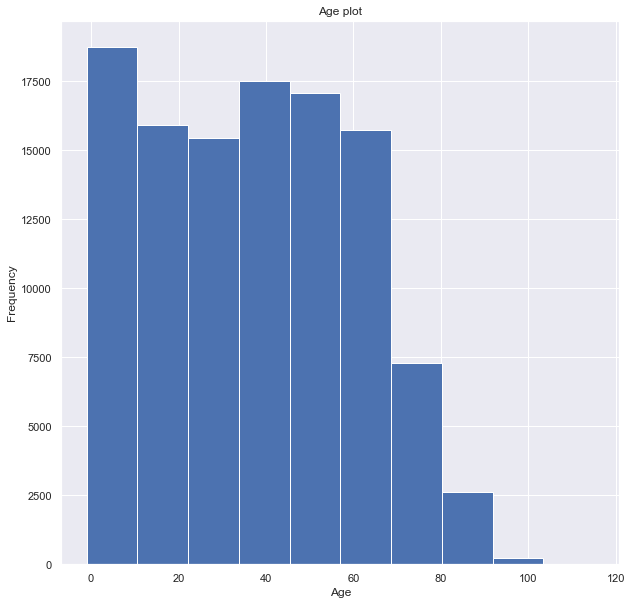

In [33]:
# histogram plot of the age column
df['Age'].plot(kind='hist',figsize=(10,10));
plt.xlabel('Age')
plt.title('Age plot')
plt.show()

> The histogram above decribes the age distribution in the dataset, showing the age with most frequency

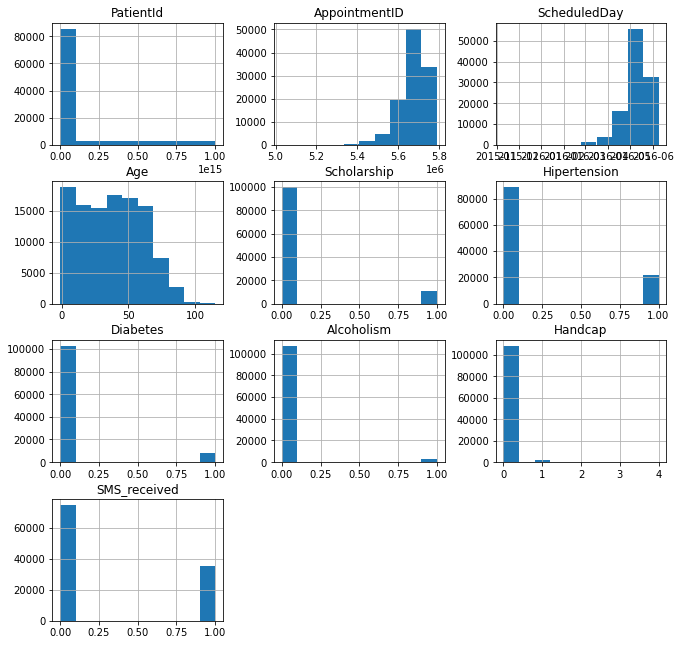

In [11]:
# check the histogram distribution of each variable in the dataset
df.hist(figsize=(11,11));

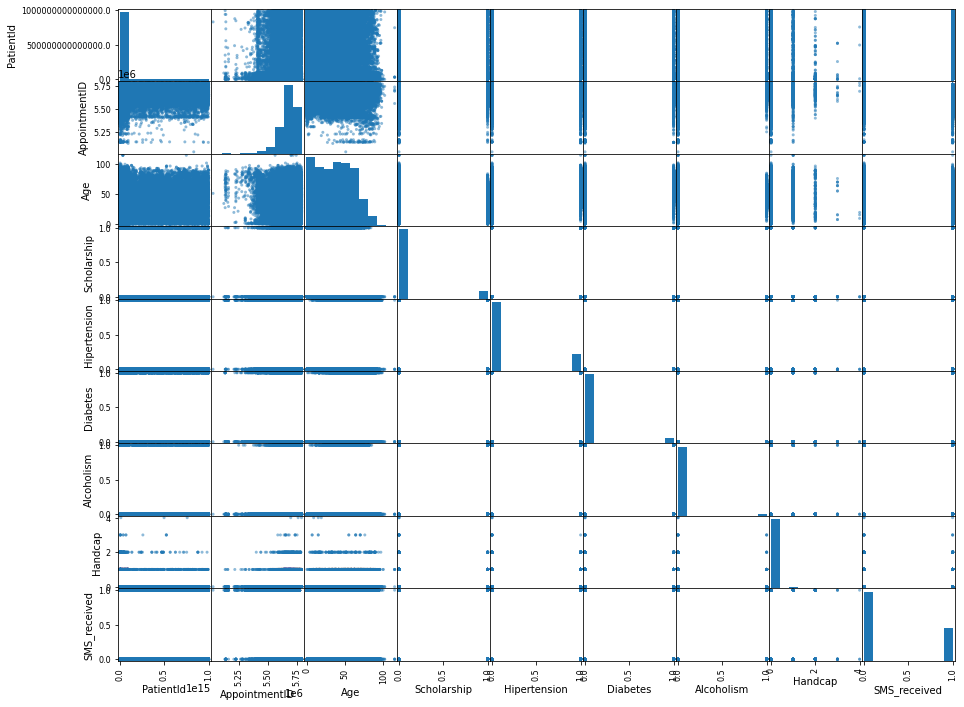

In [12]:
#scatter matrix showing the covariance between features
pd.plotting.scatter_matrix(df, figsize=(15,12));

In [27]:
df.corr() #shows the correlation between variables

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


<AxesSubplot:>

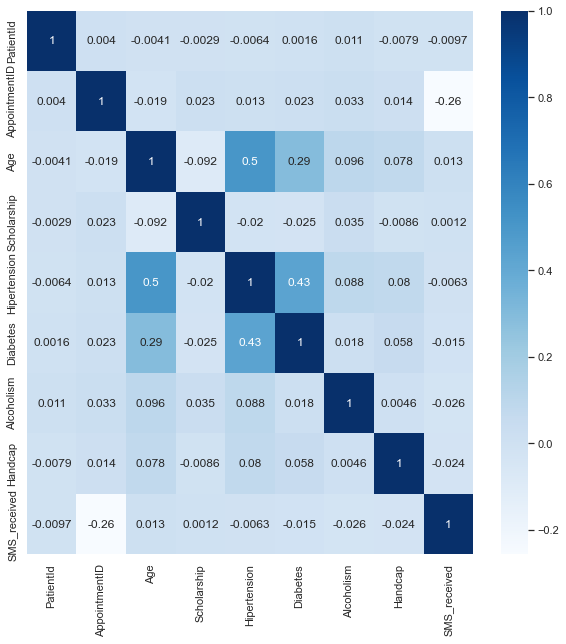

In [32]:
#heatmap to show positive and negative correlation between the features
import seaborn as sns
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot = True, cmap ='Blues')

>The above heatmap shows the postive and negative correlation between the features, that is shows the direction and strenght between the features on a scale of -1 to +1, correlation above +0.5 is considered strong.

In [14]:
 df.describe() #show the statistcal summary of variables

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='conclusions'></a>
## Conclusions

>Based on my Analsis I can say the variable 'Neighbour' is an important feature because people who live in a particular region(for this dataset 'JARDIM CAMBURI') probably because of proximity to the clinic are more likely to show up

>Second variable 'SMS_received' shows a larger number of patient don't get sms reminders therefore probability of no-show is higher

>The Third variable 'Age' shows younger patients have more chances of showing up, this could be because of better mobility and general agility.

### Limtation
> As I am still getting familiar with the ideas, I had two limits when analysing this dataset: knowledge gaps and time constraints. But I will be able to improve my work with more and ongoing study.